# 異常検知
データは何らかの形で異常な値を取ることがある。例えば入力ミスによって桁が変わる事やセンサーがあるとき異常な動作をした事、他にもルールにのっとって記録していても例外的なデータがある事で本来と異なる値を取る事がある。

ここでは機械学習による手法と信頼区間を用いた手法を紹介する。

## ライブラリのインポート

In [1]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np

## データの読み込み
ここでは実質賃金指数のデータを扱う。基本的に賃金は月による変動は小さいが月によっては賞与があるため大幅に増えることがあり、ルール上賞与も賃金に含まれるが毎月の月収とは異なる意味を持つためここでは異常値として扱う。

In [2]:
df = pd.read_csv("sarrary.csv", encoding="shift-jis")
df.head()

,年,月,賃金指数
0,1990.0,1,92.7
1,1990.0,2,85.3
2,1990.0,3,93.0
3,1990.0,4,87.7
4,1990.0,5,86.5


## データの可視化

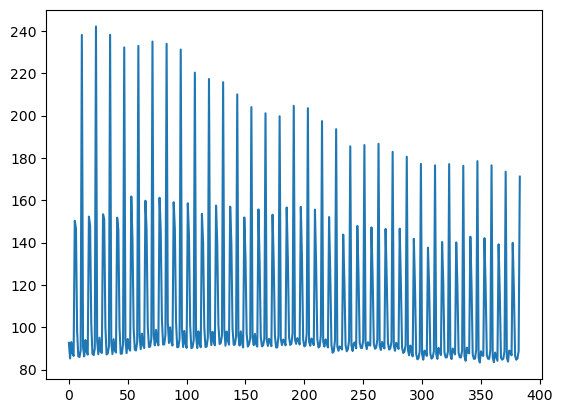

In [3]:
time = np.arange(0, len(df["賃金指数"]), 1)
plt.plot(time, df["賃金指数"])
plt.show()

## 信頼区間の設定
グラフを見る限り賞与によるデータの大きな値は140程度であることが分かるため、それに合わせて信頼区間を変更する。

In [4]:
nrange = stats.norm(loc=df["賃金指数"].mean(), scale=df["賃金指数"].std())
low, high=nrange.interval(alpha=0.60)
print(high)

138.20719374092582


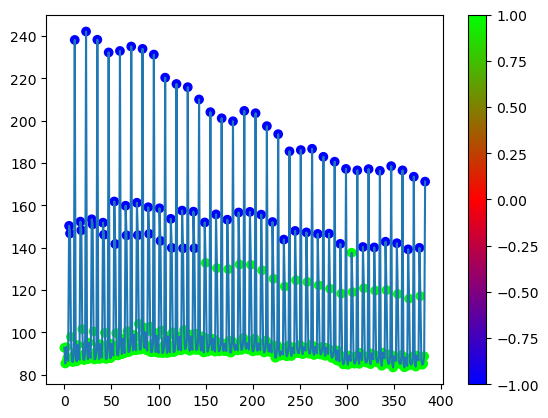

In [5]:
pred = []
for i in range(len(df["賃金指数"])):
    if df["賃金指数"].values[i] > high:
        pred.append(-1)
    else:
        pred.append(1)
plt.plot(time, df["賃金指数"])
plt.scatter(time, df["賃金指数"], cmap="brg", c=pred)
plt.colorbar()
plt.show()

この結果から信頼区間を用いて行う場合は他の月の賞与を見落としていた事や信頼区間の設定ミスでインデックスが300付近で正常と判断された
## 機械学習を用いた異常検知
機械学習では教師なし学習と似たような意味合いで説明変数のみを学習させて予測を行い異常値を-1として出力することができる。

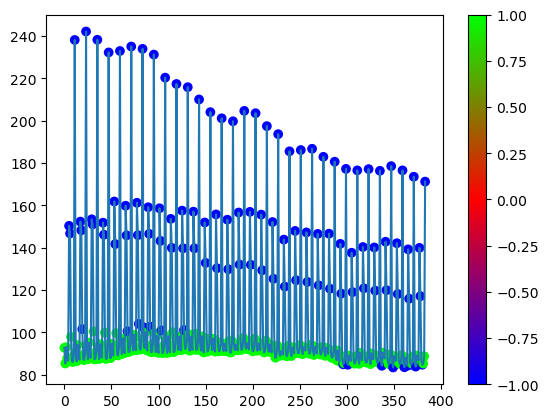

In [6]:
x = df["賃金指数"].values.reshape(-1, 1)
model = IsolationForest()
model.fit(x)
y_pred = model.predict(x)
plt.plot(time, df["賃金指数"])
plt.scatter(time, df["賃金指数"], cmap="brg", c=y_pred)
plt.colorbar()
plt.show()

この結果から信頼区間を用いて行ったときと比べて賞与月は全て異常値として扱うことができたが、一方で賞与月でない場所(賃金が高かった年の高い賃金と低かった年の低い賃金)が異常値として扱われた。そのため、こういった場合はルールベースで処理することも検討する必要がある。